# RSD test for HOD catalog 
$B_g$ calculated from the HOD catalog shows significant offsets between the RSD directions (see `rsd_directions`). Lets see if there's anything unusual about our RSD pipeline. 

Things that could go wrong: 
- ~~P, B calculations~~ halo P and B do not have any significant RSD discrepancy
- ~~RSD implementation~~ RSD implementation is super simple xyz_s = xyz + vxyz * (1+z)/H. 
- satellite peculiar velocity implementation

In [1]:
import os 
import h5py 
import numpy as np
# --- eMaNu --- 
from emanu import util as UT
from emanu import forwardmodel as FM

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [3]:
def readHOD(ireal, theta='fiducial', seed=0): 
    dir_dat = os.path.join(UT.dat_dir(), 'Galaxies', theta)
    fhod = h5py.File(os.path.join(dir_dat, str(ireal), 'GC_%i_z=0.hdf5' % seed), 'r')
    hod = {} 
    for k in fhod.keys(): 
        hod[k] = fhod[k][...]
    fhod.close() 
    hod['Position'] = hod['pos']
    hod['Velocity'] = hod['vel']
    hod['VelocityOffset'] = hod['vel_offset']
    return hod 

In [4]:
hod = readHOD(0)
print('%i galaxies' % hod['pos'].shape[0])
print('%.1f < x < %.1f' % (hod['pos'][:,0].min(), hod['pos'][:,0].max()))
print('%.1f < y < %.1f' % (hod['pos'][:,1].min(), hod['pos'][:,1].max()))
print('%.1f < z < %.1f' % (hod['pos'][:,2].min(), hod['pos'][:,2].max()))

163172 galaxies
0.0 < x < 1000.0
0.0 < y < 1000.0
0.0 < z < 1000.0


(0.0, 200.0)

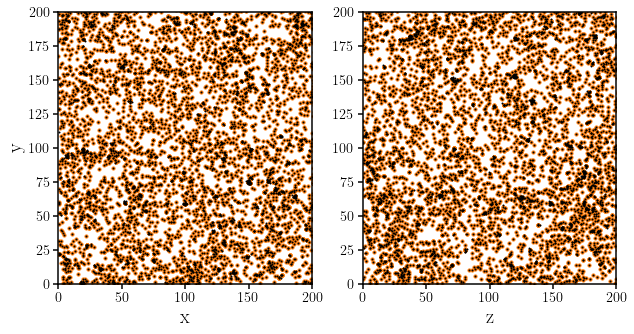

In [5]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(121)
sub.scatter(hod['halo_pos'][:,0], hod['halo_pos'][:,1], s=10, c='C1')
sub.scatter(hod['pos'][:,0], hod['pos'][:,1], c='k', s=1)
sub.set_xlabel('x', fontsize=20)
sub.set_xlim(0, 200)
sub.set_ylabel('y', fontsize=20)
sub.set_ylim(0, 200)

sub = fig.add_subplot(122)
sub.scatter(hod['halo_pos'][:,2], hod['halo_pos'][:,1], s=10, c='C1')
sub.scatter(hod['pos'][:,2], hod['pos'][:,1], c='k', s=1)
sub.set_xlabel('z', fontsize=20)
sub.set_xlim(0, 200)
sub.set_ylim(0, 200)

Now lets impose RSD 

In [6]:
xyz0 = FM.RSD(hod, LOS=[1,0,0]) 
xyz1 = FM.RSD(hod, LOS=[0,1,0]) 
xyz2 = FM.RSD(hod, LOS=[0,0,1]) 

---- RSD0 ----
163172 galaxies
0.0 < x < 1000.0
0.0 < y < 1000.0
0.0 < z < 1000.0
---- RSD1 ----
163172 galaxies
0.0 < x < 1000.0
0.0 < y < 1000.0
0.0 < z < 1000.0
---- RSD2 ----
163172 galaxies
0.0 < x < 1000.0
0.0 < y < 1000.0
0.0 < z < 1000.0


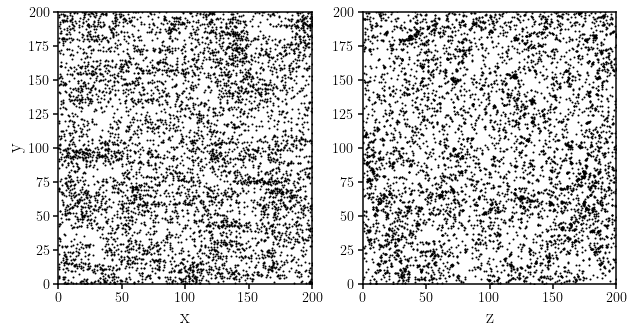

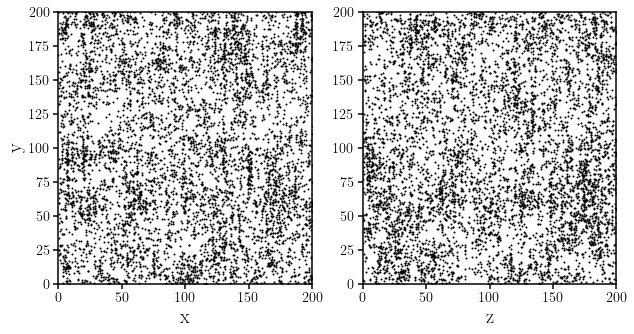

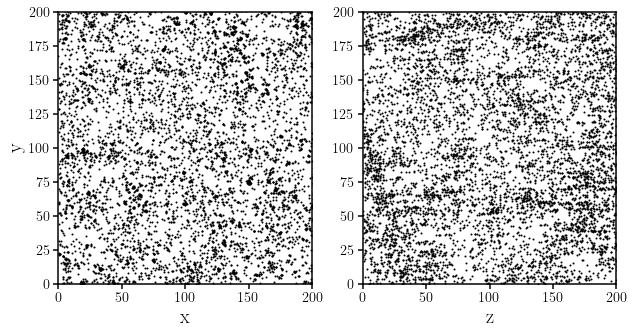

In [7]:
for i, xyz in enumerate([xyz0, xyz1, xyz2]): 
    print('---- RSD%i ----' % i)
    print('%i galaxies' % xyz.shape[0])
    print('%.1f < x < %.1f' % (xyz[:,0].min(), xyz[:,0].max()))
    print('%.1f < y < %.1f' % (xyz[:,1].min(), xyz[:,1].max()))
    print('%.1f < z < %.1f' % (xyz[:,2].min(), xyz[:,2].max()))
    
    
    fig = plt.figure(figsize=(10,5))
    sub = fig.add_subplot(121)
    sub.scatter(xyz[:,0], xyz[:,1], c='k', s=1)
    sub.set_xlabel('x', fontsize=20)
    sub.set_xlim(0, 200)
    sub.set_ylabel('y', fontsize=20)
    sub.set_ylim(0, 200)

    sub = fig.add_subplot(122)
    sub.scatter(xyz[:,2], xyz[:,1], c='k', s=1)
    sub.set_xlabel('z', fontsize=20)
    sub.set_xlim(0, 200)
    sub.set_ylim(0, 200)

In case I somehow messed up doing RSDs...

In [8]:
def do_rsd(xyz, vxyz, axis=0): 
    _xyz = xyz.copy()
    _xyz[:,axis] = _xyz[:,axis] + vxyz[:,axis]/100.
    _xyz[:,axis] = (_xyz[:,axis] + 1000.) % 1000.
    return _xyz

---- RSD0 ----
163172 galaxies
0.0 < x < 1000.0
0.0 < y < 1000.0
0.0 < z < 1000.0
---- RSD1 ----
163172 galaxies
0.0 < x < 1000.0
0.0 < y < 1000.0
0.0 < z < 1000.0
---- RSD2 ----
163172 galaxies
0.0 < x < 1000.0
0.0 < y < 1000.0
0.0 < z < 1000.0


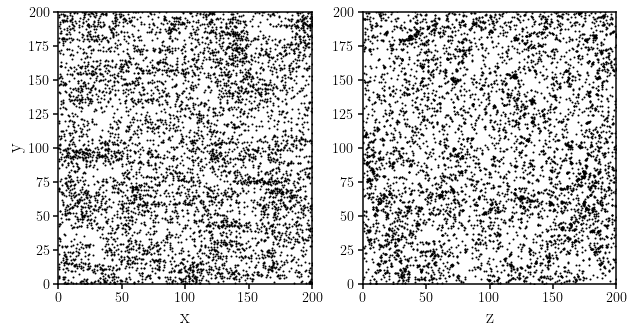

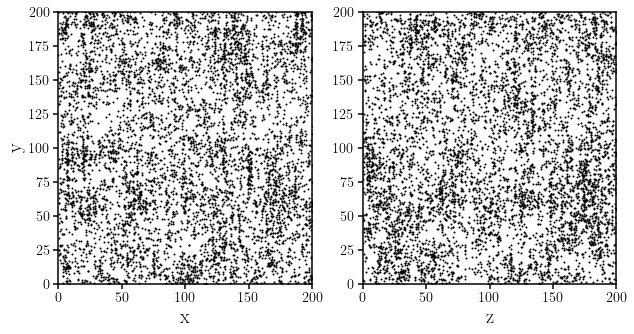

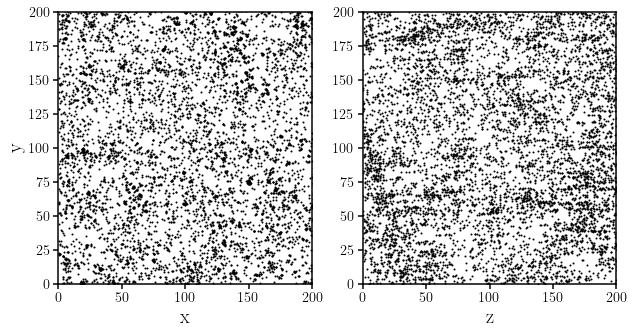

In [9]:
for i, _xyz in enumerate([xyz0, xyz1, xyz2]):
    print('---- RSD%i ----' % i)
    xyz = do_rsd(hod['pos'], hod['vel'], axis=i)
    print('%i galaxies' % xyz.shape[0])
    print('%.1f < x < %.1f' % (xyz[:,0].min(), xyz[:,0].max()))
    print('%.1f < y < %.1f' % (xyz[:,1].min(), xyz[:,1].max()))
    print('%.1f < z < %.1f' % (xyz[:,2].min(), xyz[:,2].max()))
    
    fig = plt.figure(figsize=(10,5))
    sub = fig.add_subplot(121)
    sub.scatter(xyz[:,0], xyz[:,1], c='k', s=1)
    sub.set_xlabel('x', fontsize=20)
    sub.set_xlim(0, 200)
    sub.set_ylabel('y', fontsize=20)
    sub.set_ylim(0, 200)

    sub = fig.add_subplot(122)
    sub.scatter(xyz[:,2], xyz[:,1], c='k', s=1)
    sub.set_xlabel('z', fontsize=20)
    sub.set_xlim(0, 200)
    sub.set_ylim(0, 200)

I didn't mess up the RSD. 

## satellite peculiar velocity

112072 halos
163172 galaxies
112743 halos
162725 galaxies
112047 halos
163466 galaxies
112029 halos
163113 galaxies
112279 halos
163393 galaxies
112367 halos
163164 galaxies
112084 halos
163111 galaxies
112359 halos
162910 galaxies
112350 halos
162842 galaxies
112315 halos
162853 galaxies


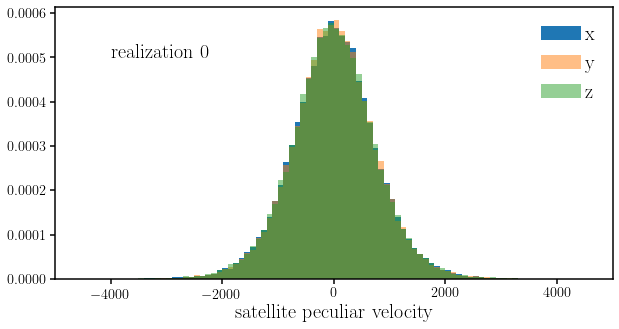

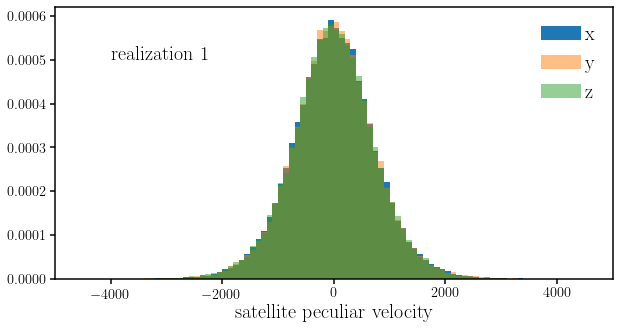

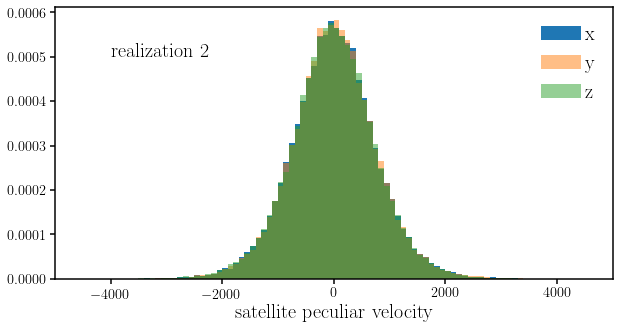

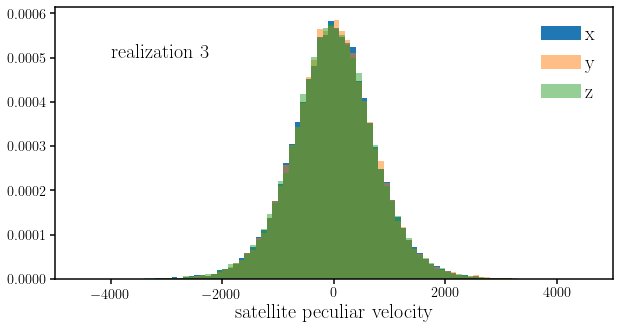

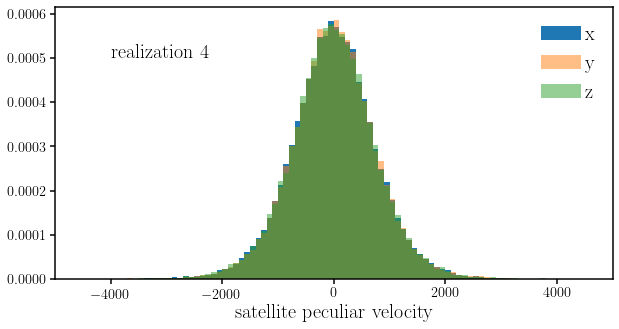

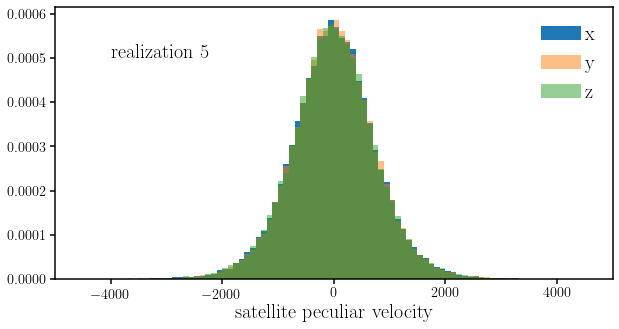

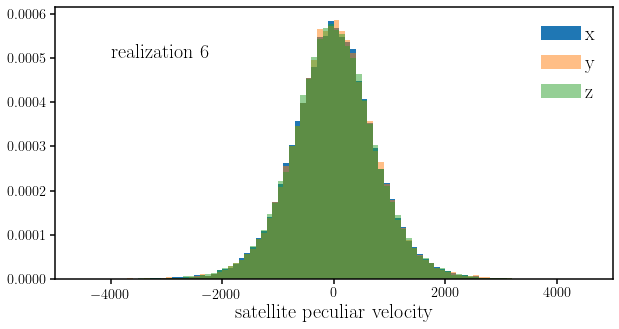

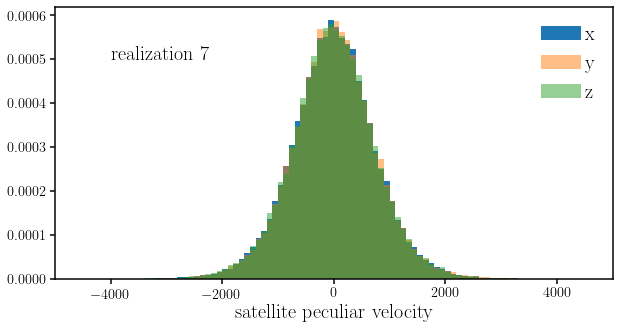

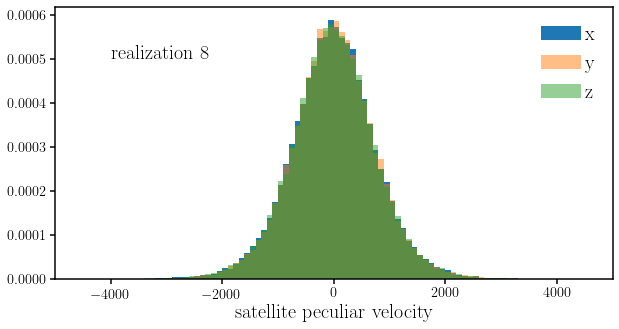

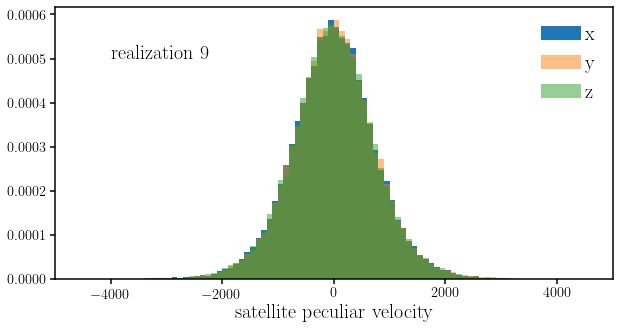

In [10]:
for i in range(10): 
    _hod = readHOD(i)
    print('%i halos' % np.sum(_hod['gal_type'] == 0))
    print('%i galaxies' % _hod['pos'].shape[0])
    is_sat = _hod['gal_type'].astype(bool)
    pec_vel = _hod['vel'] - _hod['halo_vel']
    
    fig = plt.figure(figsize=(10,5))
    sub = fig.add_subplot(111)
    _hist, _, _ = sub.hist(pec_vel[is_sat,0], range=(-5000, 5000), bins=100, density=True, label='x')
    _ = sub.hist(pec_vel[is_sat,1], range=(-5000, 5000), bins=100, alpha=0.5, density=True, label='y')
    _ = sub.hist(pec_vel[is_sat,2], range=(-5000, 5000), bins=100, alpha=0.5, density=True, label='z')

    sub.text(-4000, 0.0005, 'realization %i' % i, fontsize=20)
    sub.legend(loc='upper right', handletextpad=0.2, fontsize=20)
    sub.set_xlabel('satellite peculiar velocity', fontsize=20)
    sub.set_xlim(-5000, 5000)

106687 halos
154958 galaxies
107356 halos
154520 galaxies
106658 halos
155262 galaxies
106671 halos
154905 galaxies
106909 halos
155144 galaxies
106950 halos
154901 galaxies
106700 halos
154956 galaxies
107013 halos
154652 galaxies
106920 halos
154644 galaxies
106872 halos
154627 galaxies


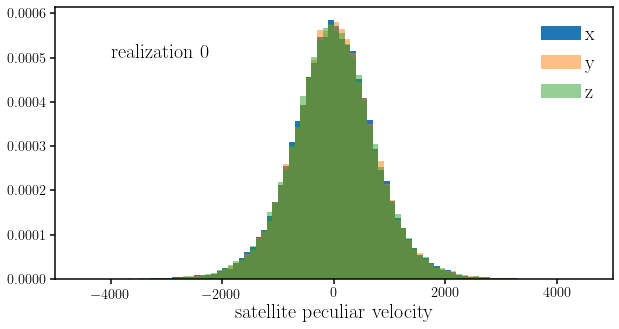

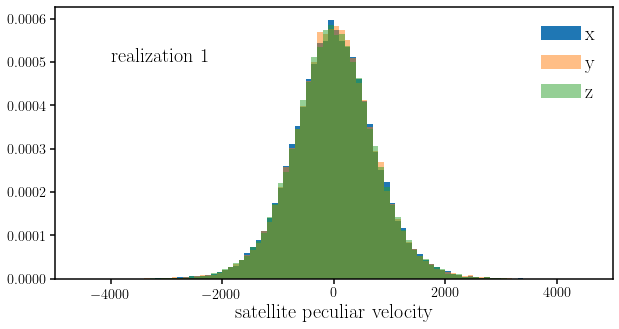

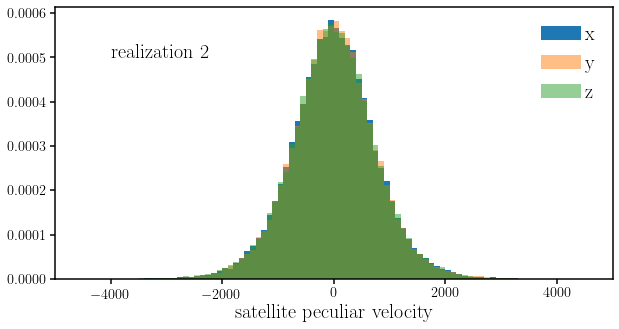

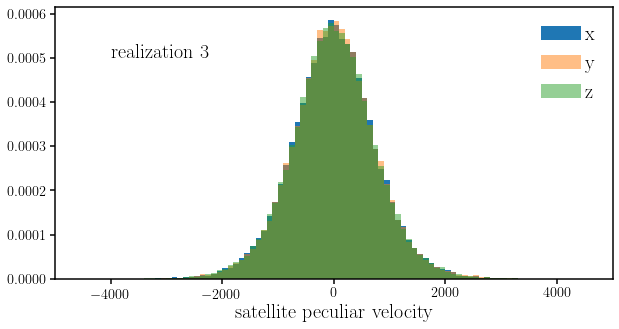

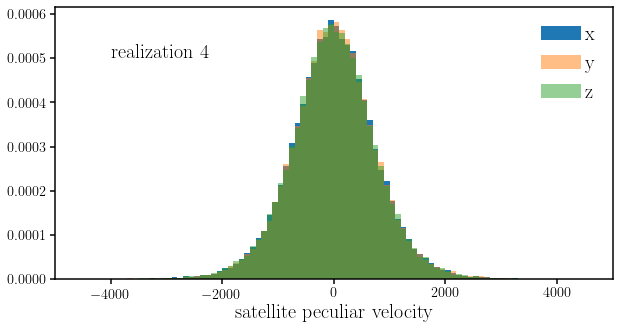

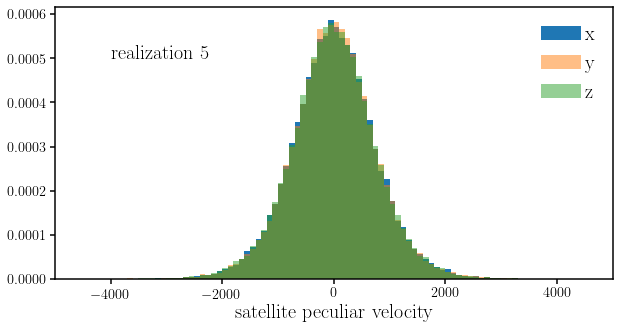

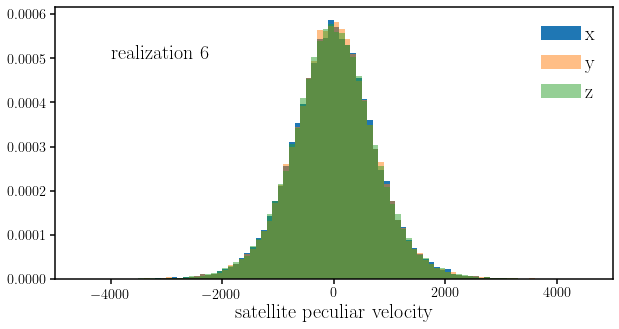

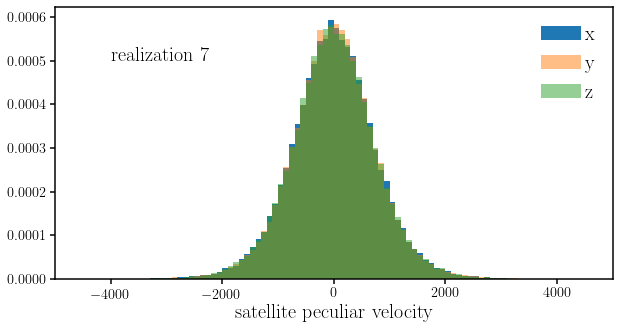

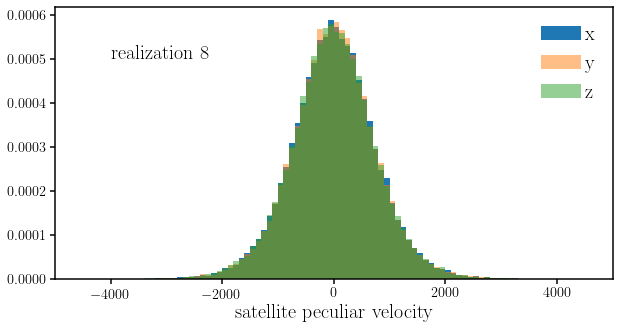

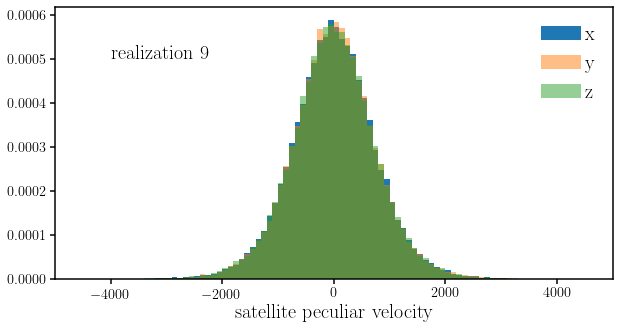

In [11]:
for i in range(10): 
    _hod = readHOD(i, theta='Om_m')
    print('%i halos' % np.sum(_hod['gal_type'] == 0))
    print('%i galaxies' % _hod['pos'].shape[0])
    is_sat = _hod['gal_type'].astype(bool)
    pec_vel = _hod['vel'] - _hod['halo_vel']
    
    fig = plt.figure(figsize=(10,5))
    sub = fig.add_subplot(111)
    _hist, _, _ = sub.hist(pec_vel[is_sat,0], range=(-5000, 5000), bins=100, density=True, label='x')
    _ = sub.hist(pec_vel[is_sat,1], range=(-5000, 5000), bins=100, alpha=0.5, density=True, label='y')
    _ = sub.hist(pec_vel[is_sat,2], range=(-5000, 5000), bins=100, alpha=0.5, density=True, label='z')

    sub.text(-4000, 0.0005, 'realization %i' % i, fontsize=20)
    sub.legend(loc='upper right', handletextpad=0.2, fontsize=20)
    sub.set_xlabel('satellite peculiar velocity', fontsize=20)
    sub.set_xlim(-5000, 5000)

154958 galaxies
155690 galaxies


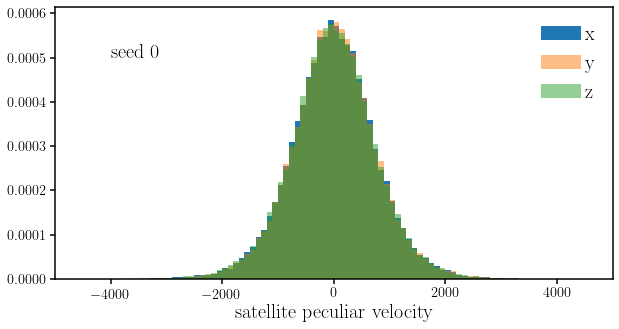

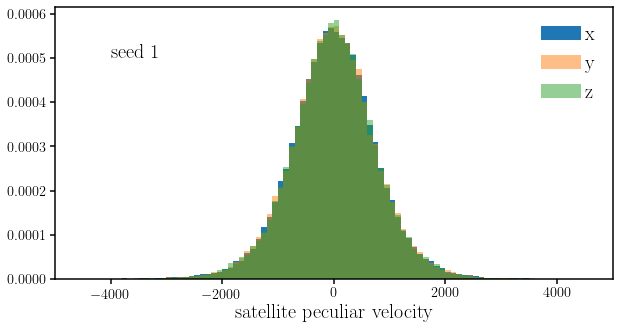

In [12]:
for i in range(2): 
    _hod = readHOD(0, theta='Om_m', seed=i)
    print('%i galaxies' % _hod['pos'].shape[0])
    is_sat = _hod['gal_type'].astype(bool)
    pec_vel = _hod['vel'] - _hod['halo_vel']
    
    fig = plt.figure(figsize=(10,5))
    sub = fig.add_subplot(111)
    _hist, _, _ = sub.hist(pec_vel[is_sat,0], range=(-5000, 5000), bins=100, density=True, label='x')
    _ = sub.hist(pec_vel[is_sat,1], range=(-5000, 5000), bins=100, alpha=0.5, density=True, label='y')
    _ = sub.hist(pec_vel[is_sat,2], range=(-5000, 5000), bins=100, alpha=0.5, density=True, label='z')

    sub.text(-4000, 0.0005, 'seed %i' % i, fontsize=20)
    sub.legend(loc='upper right', handletextpad=0.2, fontsize=20)
    sub.set_xlabel('satellite peculiar velocity', fontsize=20)
    sub.set_xlim(-5000, 5000)

The problem seems to be caused by the HOD catalogs having the same random seed. **I will confirm this by running multiple HOD seeds on one halo realization and comparing the above distribution**

In [13]:
pec_vel0_real = [] 
pec_vel1_real = [] 
pec_vel2_real = [] 

for i in range(10): 
    _hod = readHOD(i, theta='Om_p', seed=0)
    is_sat = _hod['gal_type'].astype(bool)
    pec_vel = _hod['vel'] - _hod['halo_vel']
    
    pec_vel0_real.append(pec_vel[is_sat,0])
    pec_vel1_real.append(pec_vel[is_sat,1])
    pec_vel2_real.append(pec_vel[is_sat,2])

In [14]:
pec_vel0_seed = []
pec_vel1_seed = []
pec_vel2_seed = []

for i in range(10): 
    _hod = readHOD(0, theta='Om_p', seed=i)
    is_sat = _hod['gal_type'].astype(bool)
    pec_vel = _hod['vel'] - _hod['halo_vel']
    
    pec_vel0_seed.append(pec_vel[is_sat,0])
    pec_vel1_seed.append(pec_vel[is_sat,1])
    pec_vel2_seed.append(pec_vel[is_sat,2])

(-5000.0, 5000.0)

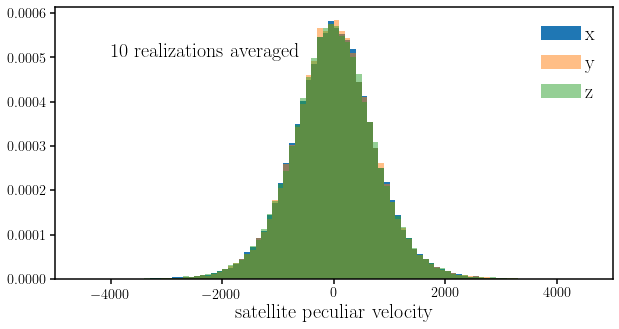

In [15]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
_ = sub.hist(np.concatenate(pec_vel0_real), range=(-5000, 5000), bins=100, density=True, label='x')
_ = sub.hist(np.concatenate(pec_vel1_real), range=(-5000, 5000), bins=100, alpha=0.5, density=True, label='y')
_ = sub.hist(np.concatenate(pec_vel2_real), range=(-5000, 5000), bins=100, alpha=0.5, density=True, label='z')

sub.text(-4000, 0.0005, '10 realizations averaged', fontsize=20)
sub.legend(loc='upper right', handletextpad=0.2, fontsize=20)
sub.set_xlabel('satellite peculiar velocity', fontsize=20)
sub.set_xlim(-5000, 5000)

(-5000.0, 5000.0)

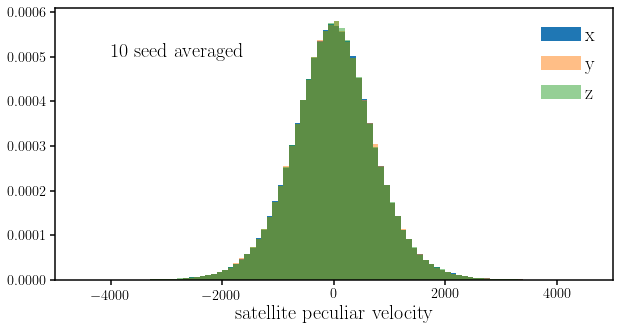

In [16]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
_ = sub.hist(np.concatenate(pec_vel0_seed), range=(-5000, 5000), bins=100, density=True, label='x')
_ = sub.hist(np.concatenate(pec_vel1_seed), range=(-5000, 5000), bins=100, alpha=0.5, density=True, label='y')
_ = sub.hist(np.concatenate(pec_vel2_seed), range=(-5000, 5000), bins=100, alpha=0.5, density=True, label='z')

sub.text(-4000, 0.0005, '10 seed averaged', fontsize=20)
sub.legend(loc='upper right', handletextpad=0.2, fontsize=20)
sub.set_xlabel('satellite peculiar velocity', fontsize=20)
sub.set_xlim(-5000, 5000)